In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
columns = pd.Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
          'label'])
train = pd.read_csv('../input/adult-incomes-in-the-united-states/adult.data', header=None, names=columns)
test = pd.read_csv(
    '../input/adult-incomes-in-the-united-states/adult.test',
        header=None,
        names=columns,
        skiprows=1
)
train.shape, test.shape

((32561, 15), (16281, 15))

In [3]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [6]:
test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [7]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label             object
dtype: object

In [8]:
y_ = (test['label'].str.contains('>') * 1)
X_test, X_eval, y_test, y_eval = train_test_split(
    test.drop('label', axis=1),
    y_,
    test_size=5000,
    random_state=42,
    stratify=y_
)

X_train = train.drop('label', axis=1)
y_train = (train['label'].str.contains('>') * 1)
X_train.shape, X_eval.shape

((32561, 14), (5000, 14))

In [9]:
num_features = X_train.dtypes[X_train.dtypes == 'int64'].index
cat_features = X_train.columns.difference(num_features)
discrete_features = pd.Index(['capital-gain', 'capital-loss'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f855554b690>,
      dtype=object)

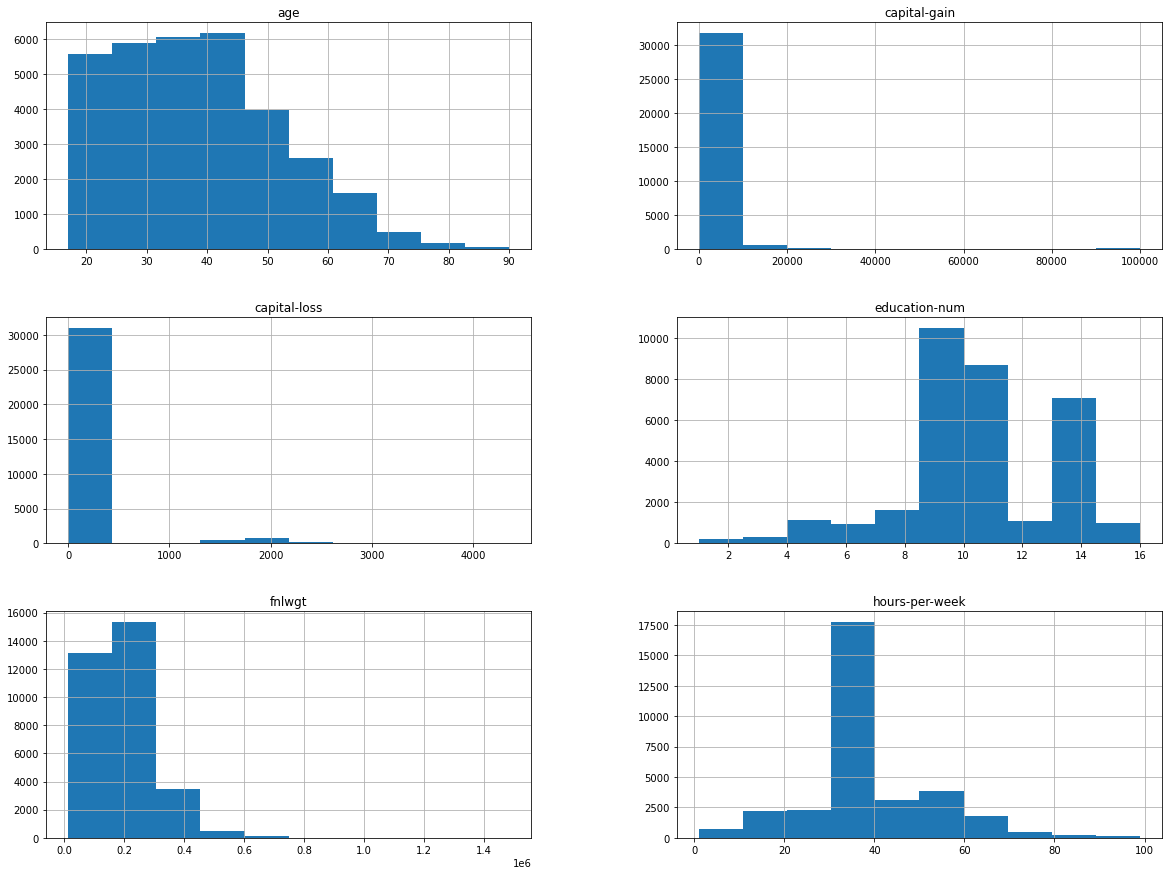

In [10]:
X_train[num_features].hist(figsize=(20, 15))

In [11]:
pipeline = Pipeline([
    ('extract', ColumnTransformer([
        ('discrete', KBinsDiscretizer(n_bins=3, strategy='kmeans'), discrete_features),
        ('one_hot', OneHotEncoder(), cat_features),
        ('scale', StandardScaler(), num_features.difference(discrete_features))
    ], remainder='passthrough')),
    #('svd', TruncatedSVD(n_components=50)),
    #('scale', StandardScaler())
])

In [12]:
pipeline.fit(X_train)
pipeline.transform(X_train)

<32561x112 sparse matrix of type '<class 'numpy.float64'>'
	with 455854 stored elements in Compressed Sparse Row format>

In [13]:
svc_l_param = {
    'C': np.logspace(-3, 2, 6)
}
svc_l = GridSearchCV(
    LinearSVC(dual=False, class_weight='balanced'),
    svc_l_param,
    scoring='accuracy',
    n_jobs=-1,
    cv=10,
)

In [14]:
%%time
svc_l.fit(pipeline.transform(X_train), y_train)

CPU times: user 1.19 s, sys: 115 ms, total: 1.3 s
Wall time: 11.6 s


GridSearchCV(cv=10, estimator=LinearSVC(class_weight='balanced', dual=False),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='accuracy')

In [15]:
svc_l.best_score_

0.7997603536212685

In [16]:
svc_l.best_estimator_

LinearSVC(C=10.0, class_weight='balanced', dual=False)

In [17]:
svc_l.score(pipeline.transform(X_train), y_train)

0.8014495869291484

In [18]:
%%time
log_reg = LogisticRegressionCV(
    cv=10,
    scoring='accuracy',
    class_weight='balanced',
    #solver='saga',
    max_iter=1000,
    n_jobs=-1,
    random_state=42
).fit(pipeline.transform(X_train), y_train)

CPU times: user 743 ms, sys: 17.7 ms, total: 761 ms
Wall time: 27.2 s


In [19]:
log_reg.score(pipeline.transform(X_train), y_train)

0.8072847885507202

In [20]:
XX_train, X_cv, yy_train, y_cv = train_test_split(
    X_train,
    y_train,
    test_size=0.3,
    random_state=24,
    stratify=y_train
)
pipeline.fit(XX_train)
XX_train.shape, X_cv.shape

((22792, 14), (9769, 14))

In [21]:
%%time
forest_param = {
    'n_estimators': [200],
    'max_features': list(range(1, 14, 2)),
    'max_samples': [0.001, 0.1, 0.2, 0.3, 0.5]
}
x_tr = pipeline.transform(XX_train)
x_cv = pipeline.transform(X_cv)
best = (None, 0)
for param in ParameterGrid(forest_param):
    clf = RandomForestClassifier(
        **param,
        random_state=4,
        class_weight='balanced'
    ).fit(x_tr, yy_train)
    score = accuracy_score(y_cv, clf.predict(x_cv))
    if score > best[1]:
        best = (clf, score)
    else:
        pass
best[1]

CPU times: user 6min 18s, sys: 685 ms, total: 6min 19s
Wall time: 6min 19s


0.8505476507319071

In [22]:
best[0]

RandomForestClassifier(class_weight='balanced', max_features=13,
                       max_samples=0.2, n_estimators=200, random_state=4)

In [23]:
best[0].score(pipeline.transform(X_train), y_train)

0.8872270507662541

In [24]:
accuracy_score(
    DummyClassifier(strategy='prior')
        .fit(X_test, y_test)
        .predict(X_test),
    y_test)

0.7637620778299796

In [25]:
log_reg.score(pipeline.transform(X_eval), y_eval)

0.8132

In [26]:
svc_l.score(pipeline.transform(X_eval), y_eval)

0.8092

In [27]:
best[0].score(pipeline.transform(X_eval), y_eval)

0.862

In [28]:
best_clf = best[0]
best_clf.fit(pipeline.transform(X_train.append(X_eval)), y_train.append(y_eval))
best_clf.score(pipeline.transform(X_test), y_test)

0.8483290488431876